### Probabilistic models of uncertainty

#### Overview

Probabilistic models of uncertainty require the definition of a
probability space, which is given by $(\Omega, \mathcal{F}, P)$, where
$\Omega$ represents the space of all possible outcomes (the sample
space), $\mathcal{F}$ is a $\sigma$ algebra representing the set of
events, where each event is a set containing outcomes, and
$P \in [0, 1]$ represents probabilities which are assigned to the events
in $\mathcal{F}$ {cite}`jaynes2003probability`. Note that the probability
assigned to the space of all outcomes is 1, $P(\Omega) = 1$, and the
probability of the empty set of outcomes is zero, $P(\emptyset) = 0$. By
definition, for an outcome $\omega\in \Omega$ and its complementary
outcome $\omega^C$, their intersection is the empty set,
$\omega \cap \omega^C = \emptyset$, and their union is equal to the
entire sample space, $\omega \cup \omega^C = \Omega$. It follows that
$P(\omega) + P(\omega^C) = 1$.

The aim of defining the probability space is usually to obtain the
random variable $X\colon \Omega \to E$, which is a function from the set
of outcomes $\Omega$ to the measurable space $E$. The probability that
$X$ takes a value falling inside in the set $S$ is given by

\begin{equation}
\operatorname {Pr} (X \in S) = P(\{\omega\in \Omega|X(\omega) \in S\}).
\end{equation}
When the measurable space is the real line, $E = \mathbb{R}$, the
cumulative distribution function (CDF) can be obtained by calculating
the probability of the event that that $X$ is less than a particular
value $x$, $\{X<x\}$. Therefore the cumulative distribution function is
given by 

$$F_X(x) = P(X \le x).$$ 

The well known probability
distribution function (PDF) of the variable, $p_X(x)$, is the gradient
of the cumulative distribution function,
$p_X(x) = \frac{d F_X(x)}{d x}$. The probability density represents the
relative likelihood of a random variable taking a particular value. Note
that, as follows from our definition, the cumulative distribution must
increase monotonically with $x$, and as such the probability density
function is always positive. In addition, the integral of the
probability density function over the whole real line will always be
equal to 1, since $\lim_{x \to \infty}F_X(x) = 1$ and
$\lim_{x \to -\infty}F_X(x) = 0$ {cite}`ross2014first`.

Note that important properties of the random variable are summarised by
the mean of the random variable,

$$\mu_X = \operatorname{\mathbb{E}}[X] = \int_\mathbb{R} x p_X(x) dx,$$

where $\operatorname{\mathbb{E}}$ is the expectation operator, and the
variance

$$\operatorname{Var}(X) = \operatorname{\mathbb{E}}[(X - \mu_X)^2] = \int_\mathbb{R} (x-\mu_X)^2 p_X(x) dx,$$

which is sometimes quoted in terms of the standard deviation,
$\sigma_X = \sqrt{\operatorname{Var}(x) }$ {cite}`ross2014first`. The
standard deviation is sometimes expressed as the coefficient of
variation of a varible ($CoV$), which is defined as
$\text{CoV} = \frac{\mu_X}{\sigma_X}$.

In practical calculations, one is not usually concerned with the
probability space $(\Omega, \mathcal{F}, P)$, because defining either
the probability distribution function or cumulative distribution
function by assigning probability density to the possible values for $X$
is usually sufficient for calculations to proceed. The measure theoretic
framework for probability theory which we have summarised here was
introduced by {cite}`andrei1950kolmogorov`. An equivalent theory was derived by
extending Boolean logic to assign quantitative values of truthfulness to
statements, termed plausibilities, in the seminal work of
{cite}`jaynes2003probability`.

The probability of an event may be considered in terms of probabilities
of sub-events, for example if $A=A_1\cap A_2$, where $\cap$ represents
the logical and operation, then $P(A) = P(A_1 \cap A_2)$. This can be
evaluated as $P(A_1\cap A_2) = P(A_1|A_2) P(A_2)$, by definition.
$P(A_1|A_2)$ is the probability that $A_1$ is true, given that $A_2$ is
true. The dependence between $A_1$ and $A_2$ is encoded in $P(A_1|A_2)$;
$P(A_1|A_2)=P(A_1)$ if $A_1$ and $A_2$ are independent events, so that
$P(A)=P(A_1)P(A_2)$. If the dependence is not known then bounds for
$P(A)$ can be established, and this is discussed in
{cite}`sadeghi2020analytic`. Similar bounds are available for the logical
or operation, $\cup$.

One may model dependencies between variables by considering the joint
distribution over more than one variable, e.g.
$p(x_1, x_2) = P(X_1 = x_1 \cap X_2 = x_2)$, where $X_1$ and $X_2$ are
two random variables. Traditionally, a generative model is defined as a
joint probability distribution. One may summarise the properties of a
joint distribution using the co-variance between two variables

$$\operatorname{cov}(X_1, X_2) = \operatorname{\mathbb{E}}[(X_1 - \mu_{X_1})(X_2 - \mu_{X_2})] = \int_\mathbb{R} \int_\mathbb{R} (x_1-\mu_{X_1})(x_2-\mu_{X_2}) p(x_1, x_2) d x_1 d x_2.$$

Taking the co-variance of a variable with itself yields the variable's
variance, $\operatorname{cov}(X_1, X_1) = \operatorname{Var}(X_1)$
{cite}`ross2014first`.


#### Worked example : elementary probability theory

The amount of rainfall in mm on a particular day is given by the normal random variable $p(x) = \mathcal{N}(\mu=10,\sigma=1)$

What is the probability of less than 8mm of rainfall?

The probability of less than a certain amount of rainfall is obtained by integrating the probability density function up to that amount. This is equivalent to the cumulative density function at that value.

$P(\text{rainfall}<8mm) = \int_{-\infty}^{8mm} p(x) dx = F(x=8mm)$

In the following code snippet we evaluate the CDF of the random variable using `scipy.stats`.
Then we plot the PDF and CDF of the random variable using `matplotlib` and show the relevant integrated area of the random variable in red.

0.022750131948179195


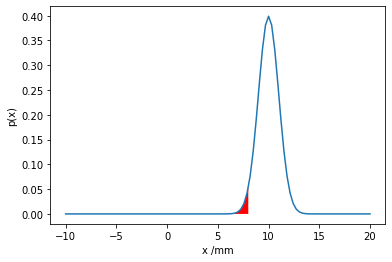

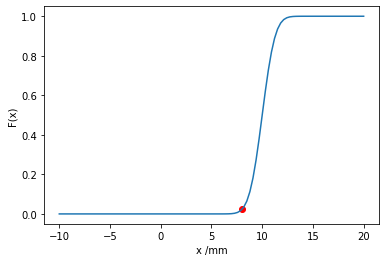

In [1]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

print(scipy.stats.norm.cdf(8, loc=10, scale=1))


plot_x_range = np.linspace(-10, 20, 100)
plot_x_range_integrate = np.linspace(-10, 8, 100)
plt.plot(plot_x_range, scipy.stats.norm.pdf(plot_x_range, loc=10, scale=1))
plt.fill_between(
    plot_x_range_integrate,
    0,
    scipy.stats.norm.pdf(plot_x_range_integrate, loc=10, scale=1),
    facecolor="red"
)
plt.xlabel("x /mm")
plt.ylabel("p(x)")
plt.show()

plot_x_range = np.linspace(-10, 20, 100)
plt.plot(plot_x_range, scipy.stats.norm.cdf(plot_x_range, loc=10, scale=1))
plt.scatter(8, scipy.stats.norm.cdf(8, loc=10, scale=1), color='red')
plt.xlabel("x /mm")
plt.ylabel("F(x)")
plt.show()

Do you notice anything strange about this model? The probability of a negative amount of rainfall is small, but non-zero. Can you think of a way to change the support of the probability distribution and thereby improve the model?

#### Worked example : elementary probability theory

Consider two events: a patient having a disease $A_P$, and the patient testing positive for the disease $A_T$. The two events are associated with the probabilities $P(A_P)=0.001$ for the patient having the disease, $P(A_T)=0.1$ for a random patient testing positive and $P(A_T|A_P)=x$ for the patient testing positive if they have the disease. Plot the probability that a patient has the disease if they test posititive, $P(A_P|A_T)$, as a function of $x$:

We know $P(A_P|A_T)=\frac{P(A_P\cap A_T)}{P(A_T)} = \frac{P(A_T|A_P) P(A_P)}{P(A_T)}$

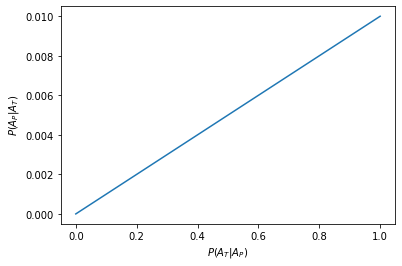

In [1]:
prob_infected = 0.001
prob_positive_test = 0.1


def prob_true_positive(x): return x * prob_infected / prob_positive_test


plot_x_range = np.linspace(0, 1, 10)
plt.plot(plot_x_range, prob_true_positive(plot_x_range))
plt.xlabel("$P(A_T|A_P)$")
plt.ylabel("$P(A_P|A_T)$")
plt.show()

So even with a perfect test, $P(A_T|A_P)=1$, the probability of having the disease after testing positive is only 0.01. This makes sense because very few people have the disease but the probability of the test being positive is much higher, i.e. 0.1 >> 0.001

This is clear when we plot the number of false positives, $P({A_P}^C|A_T) = 1-P({A_P}|A_T)$

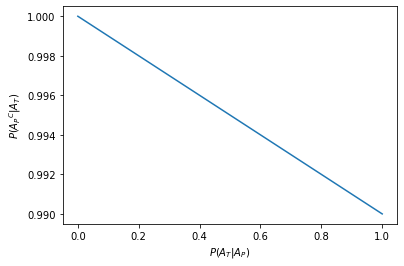

In [2]:
plt.plot(plot_x_range, 1 - prob_true_positive(plot_x_range))
plt.xlabel("$P(A_T|A_P)$")
plt.ylabel("$P({A_P}^C|A_T)$")
plt.show()

(sec:probabilstic_computation)=
#### Computation with Probabilistic Models 

The expectation (mean value) of a general function $g(x)$ with respect
to an uncertain variable, which is modelled with a probability
distribution $p(x)$, can be evaluated as

```{math}
:label: eqn_expectation
\operatorname{\mathbb{E}}[g(X)] = \int_{\mathbb{R}^N} g(x) p(x) dx, 
```

where we now allow $x$ to have multiple components.

In the most general case, one can draw realisations, known as samples,
from the random variable by selecting values for the variable in the
ratio of their assigned probability densities. Given $M$ samples drawn
from $p(x)$, $\{ x_{(1)}, \ldots, x_{(M)} \}$,
$\operatorname{\mathbb{E}}[g(X)]$ can be approximated by the Monte Carlo
estimator

```{math}
:label: eqn_monte_carlo_estimator
\operatorname{\mathbb{E}}[g(X)] \approx I = \frac{1}{M} \sum_{i=1}^M g(x_{(i)}). 
```
The error of the Monte Carlo
estimator is given by

$$\frac{\sigma_g}{\sqrt{M}} = \frac{\sqrt{\sum_{i=1}^M (g(x_{(i)}) - I)^2}}{\sqrt{M (M-1)}},$$

where $\sigma_g^2$ is the unbiased sample estimator of the variance of $g$
{cite}`rubinstein2016simulation`. Clearly the error in the estimator
decreases with $\frac{1}{\sqrt{M}}$, so collecting more samples will
slowly decrease the error in the estimator {cite}`press1992numeric`. However
in many circumstances collecting more samples of $M$ is not feasible,
and $\sigma_g$ may be large.

Therefore, in practice, more efficient methods are used to compute the
expectation. In {ref}`ch:reliability_analysis` efficient methods for solving a
specific form of this integral from engineering reliability analysis
will be explained. However, it is useful to note there are some more
general efficient approaches for computing an approximation of the
expectation in
{eq}`eqn_expectation`.

For example, provided that $g(x)$ can be differentiated, one can attempt
to approximate the expectation in
{eq}`eqn_expectation` with a Taylor expansion

$$\operatorname{\mathbb{E}}[g(X)] = \operatorname{\mathbb{E}}[ g (\mu_X + (X - \mu_X ) ) ]  \approx \operatorname{\mathbb{E}} [g(\mu_X) + g'(\mu_X) ( X-\mu_X ) + \frac{1}{2}g''(\mu_X) ( X - \mu_X )^2 \ldots ],$$

where $\mu_X$ is the mean of random variable $X$. When $g(x)$ is linear,
the the expectation in
{eq}`eqn_expectation` can therefore be calculated trivially,
since $X - \mu_X = 0$ and $g''(x) = 0$. If $g(x)$ is non-linear then
using the approximation
$\operatorname{\mathbb{E}}[g(X)] \approx \operatorname{\mathbb{E}} [g(\mu_X)]$
is correct only to first order {cite}`wan2000unscented`. At the expense of
generality, the expectation is evaluated using only two evaluations of
$g(x)$, which is a clear advantage when $g(x)$ is expensive to evaluate,
or the computation of $\operatorname{\mathbb{E}}[g(X)]$ is required
quickly. This idea is applied to engineering in the Kalman Filter and
Extended Kalman Filter {cite}`wan2000unscented`.

{cite}`uhlmann1995dynamic` proposed a more accurate approximate method for
approximating the expectation in
{eq}`eqn_expectation` which requires few evaluations of $g(x)$,
and does not require $g(x)$ to be differentiated. The Unscented
Transformation, sometimes referred to as deterministic sampling,
requires the computation of so called sigma points which are specially
chosen represent the covariance of the input distributions. It is then
only required to compute $g(x)$ for these sigma points, after which a
weighted average is used to obtain the approximation of the expectation
in {eq}`eqn_expectation`. {cite}`wan2000unscented` demonstrate that the
Unscented Transformation is accurate to at least second order, but
potentially to third or forth order in some cases. The number of sigma
points required, and hence the cost of the computation, depends linearly
on the dimensionality of $x$. Although this approach is more generally
applicable and accurate than the Taylor Series method, the Unscented
Transformation is limited to use cases where $x$ has reasonably low
dimensionality, because otherwise too many evaluations of $g(x)$ are
required. The method has been applied to engineering in the Unscented
filter {cite}`wan2000unscented` and uncertainty quantification in the nuclear
industry by {cite}`zhangpreliminary` and {cite}`perretg`.

In order to avoid these approximations, techniques can be used to obtain
more accurate approximations of $g(x)$ in specific cases (metamodels),
or alternatively efficient sampling strategies can be used. This is
discussed in {ref}`ch:reliability_analysis` for application to reliability
analysis.

(sec:umbrella_example_1)=
#### Worked example : Computation with a probabilistic model

Again, the amount of rainfall in mm on a particular day is given by the normal random variable $p(x) = \mathcal{N}(\mu=10,\sigma=1)$.
It is known that the number of umbrellas sold in London on a particular day is given by $g(x) = 1000 x^2$.

Estimate the number of umbrellas sold in London given our uncertain model of rainfall.

$$\text{Umbrellas sold} = \int_{-\infty}^{\infty} p(x) 1000 x^2 dx$$

Analytically evaluating this integral in a popular computer algebra system yields $\text{Umbrellas sold}=101000$.

In [4]:
# First try Monte Carlo integration
n_samples = 100
samples_x = scipy.stats.norm(loc=10, scale=1).rvs(n_samples)


def g(x): return 1000 * x ** 2


umbrellas_sold = np.mean(g(samples_x))

print("We expect that {} umbrellas were sold".format(umbrellas_sold))

error = np.std(g(samples_x)) / np.sqrt(n_samples-1)

print("The error of this Monte Carlo estimator is {}".format(error))

We expect that 101287.30984936524 umbrellas were sold
The error of this Monte Carlo estimator is 2063.720321793903


Using `{}` in a string with `.format()` is a compact and readable method of inserting a quantity into a print statement. The scipy stats library is used for the random variables, and the expectation is taken using `np.mean`.

Note that we divide the standard deviation from numpy by $M-1$, since the output of `np.std` is the standard deviation and _not_ the unbiased estimator for sample standard deviation.

Most importantly the Monte Carlo simulation agrees with the analytic result!

We can plot how the result changes with an increasing number of samples.

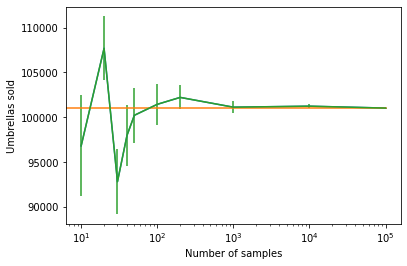

In [5]:
def monte_carlo_simulation(n_samples):
    """
    Monte Carlo Simulation for number of umbrellas sold in London on a
      particular day
        Args:
            n_samples (int): Number of samples to be made in Monte Carlo
              simulation
        Returns:
            Number of umbrellas sold (float): The expected number of umbrellas
              sold
            error (float): The error in the estimated number of umbrellas sold
    """
    samples_x = scipy.stats.norm(loc=10, scale=1).rvs(n_samples)
    def g(x): return 1000 * x ** 2

    umbrellas_sold = np.mean(g(samples_x))

    error = np.std(g(samples_x)) / np.sqrt(n_samples-1)
    return umbrellas_sold, error


number_of_samples = [10, 20, 30, 40, 50, 100, 200, 1000, 10000, 100000]
simulation_results = [monte_carlo_simulation(n) for n in number_of_samples]

plt.plot(number_of_samples, list(zip(*simulation_results))[0])
plt.plot([0, 100000], [101000]*2)
plt.errorbar(number_of_samples, *zip(*simulation_results))
plt.xlabel("Number of samples")
plt.ylabel("Umbrellas sold")
plt.xscale("log")
plt.show()

Notice that all simulation results are within 3 standard deviations of the true value.

The true value from the analytic calculation is shown with an orange line. The simulation results and error bars are shown in green.

Note that we used several useful features of python in the above code.

We use a docstring below the function definition to explain what the purpose of the function is and the expected inputs and outputs.

Note that the defined function returns two outputs - these are treated like a `tuple` object when inserted into the list. `zip(*simulation_results)` converts the list of tuples into a tuple of lists.

As in the previous example, the sampling is vectorised (i.e. no loop is used in generating the samples for each simulation) to reduce the time required for computation.

A _list comprehension_ is used to tidily obtain the results from the Monte Carlo simulation and put these into a list.

To reduce the number of samples required we now evaluate the integral using a Taylor Series.


In [6]:
def g(x): return 1000 * x ** 2


def g_dash_dash(x): return 1000 * 2


loc = 10
scale = 1

zero_order_taylor_series = g(loc)
# first order contribution is zero!
second_order_term = g_dash_dash(loc) * 0.5 * scale
taylor_series_umbrellas = zero_order_taylor_series + second_order_term

print("Taylor series - umbrellas sold: {}".format(taylor_series_umbrellas))

Taylor series - umbrellas sold: 101000.0


The correct result is obtained exactly! This is because the third and higher derivatives of $g(x)$ are zero!